<a href="https://colab.research.google.com/github/srishilesh/Udacity_DLND/blob/master/Neural%20Networks/MNIST_PyTorch_Digit_Classification_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np


In [2]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

num_workers = 0

batch_size = 20

valid_size = 0.2

transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data',train=True,download=True,transform=transform)
test_data = datasets.MNIST(root='data',train=False,download=True,transform=transform)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size*num_train))
train_idx,valid_idx = indices[split:],indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler=train_sampler,num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,sampler=valid_sampler,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=num_workers)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 27627832.55it/s]                            


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


32768it [00:00, 457425.41it/s]
  1%|          | 16384/1648877 [00:00<00:11, 146459.07it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


1654784it [00:00, 7579216.11it/s]                            
8192it [00:00, 182683.91it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw
Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


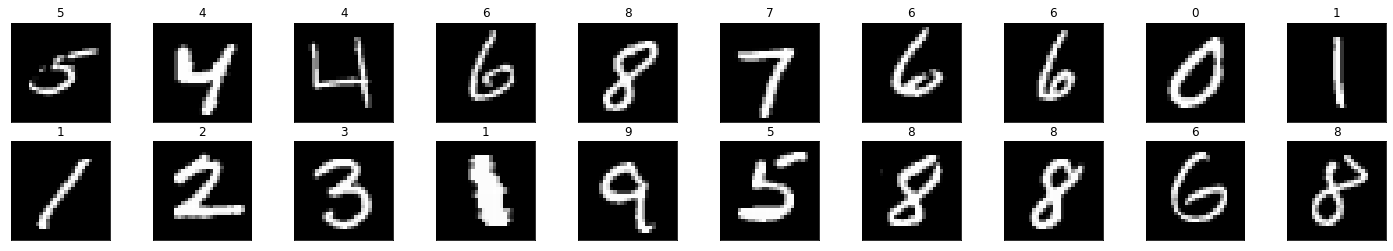

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
  ax = fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(images[idx]),cmap='gray')
  ax.set_title(str(labels[idx].item()))


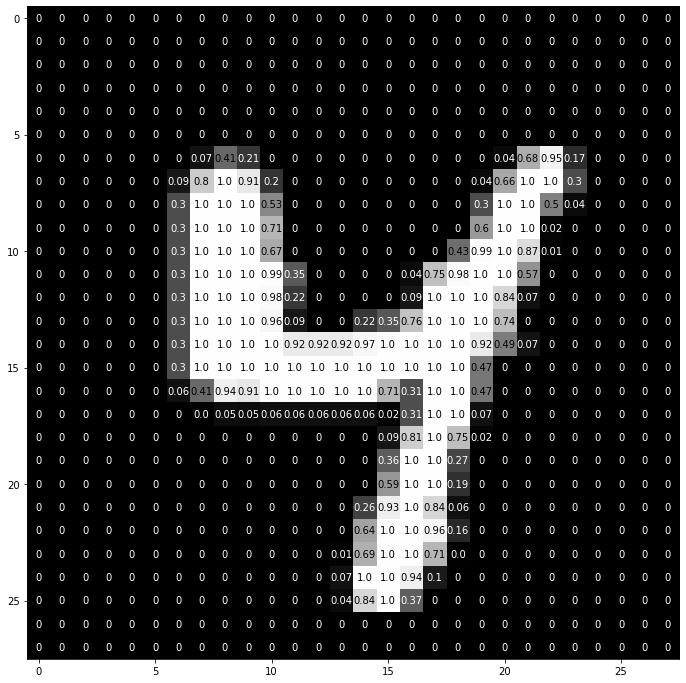

In [4]:
img = np.squeeze(images[1])
 
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img,cmap='gray')
width,height = img.shape
thresh = img.max()/2.5
for x in range(width):
  for y in range(height):
    val = round(img[x][y],2) if img[x][y] !=0 else 0
    ax.annotate(str(val), xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[x][y]<thresh else 'black')



In [5]:
# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module):
#   def __init__(self):
#     super(Net,self).__init__()
#     hidden_1 = 512
#     hidden_2 = 512
#     self.fc1 = nn.Linear(28*28,hidden_1)
#     self.fc2 = nn.Linear(hidden_1,hidden_2)
#     self.fc3 = nn.Linear(hidden_2,10)
#     self.dropout = nn.Dropout(0.2)

#     def forward(self,x):
#       x = x.view(-1,28*28)
#       x = F.relu(self.fc1(x))
#       x = self.dropout(x)
#       x = F.relu(self.fc2(x))
#       x = self.dropout(x)
#       x = self.fc3(x)
#       return x

# # class Net(nn.Module):
# #   def __init__(self):
# #     super(Net,self).__init__()
# #     self.fc1 = nn.Linear(28*28,1)

# #   def forward(self,x):
# #     x = x.view(-1,28*28)
# #     x = F.relu(self.fc1(x))
# #     return x
# model = Net()
# print(model)

import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [0]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [8]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

valid_loss_min = np.Inf
#model.train() # prep model for training

for epoch in range(n_epochs):

  # monitor training loss
  train_loss = 0.0
  valid_loss = 0.0
  ###################
  # train the model #
  ###################
  model.train()
  for data, target in train_loader:
    
      # clear the gradients of all optimized variables
    optimizer.zero_grad()
      # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # output = output[:,0]
      # calculate the loss
    loss = criterion(output, target)
      # backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
      # perform a single optimization step (parameter update)
    optimizer.step()
      # update running training loss
    train_loss += loss.item()*data.size(0)

  ######################    
  # validate the model #
  ######################
  model.eval() # prep model for evaluation
  for data, target in valid_loader:
      # forward pass: compute predicted outputs by passing inputs to the model
      output = model(data)
      # calculate the loss
      loss = criterion(output, target)
      # update running validation loss 
      valid_loss += loss.item()*data.size(0)
              
  # print training/validation statistics 
  # calculate average loss over an epoch
  train_loss = train_loss/len(train_loader.sampler)
  valid_loss = valid_loss/len(valid_loader.sampler)
  
  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
      epoch+1, 
      train_loss,
      valid_loss
      ))
  
  # save model if validation loss has decreased
  if valid_loss <= valid_loss_min:
      print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
      valid_loss_min,
      valid_loss))
      torch.save(model.state_dict(), 'model.pt')
      valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.934789 	Validation Loss: 0.394652
Validation loss decreased (inf --> 0.394652).  Saving model ...
Epoch: 2 	Training Loss: 0.354765 	Validation Loss: 0.300808
Validation loss decreased (0.394652 --> 0.300808).  Saving model ...
Epoch: 3 	Training Loss: 0.278822 	Validation Loss: 0.251826
Validation loss decreased (0.300808 --> 0.251826).  Saving model ...
Epoch: 4 	Training Loss: 0.231670 	Validation Loss: 0.209737
Validation loss decreased (0.251826 --> 0.209737).  Saving model ...
Epoch: 5 	Training Loss: 0.197371 	Validation Loss: 0.180201
Validation loss decreased (0.209737 --> 0.180201).  Saving model ...
Epoch: 6 	Training Loss: 0.171644 	Validation Loss: 0.163603
Validation loss decreased (0.180201 --> 0.163603).  Saving model ...
Epoch: 7 	Training Loss: 0.151126 	Validation Loss: 0.145452
Validation loss decreased (0.163603 --> 0.145452).  Saving model ...
Epoch: 8 	Training Loss: 0.134320 	Validation Loss: 0.133641
Validation loss decreased (0.14545

KeyboardInterrupt: ignored

In [9]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [10]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data,target in test_loader:
  output = model(data)
  loss = criterion(output,target)
  test_loss+=loss.item()*data.size(0)
  _,pred = torch.max(output,1)
  correct = np.squeeze(pred.eq(target.data.view_as(pred)))
  for i in range(len(target)):
    label = target.data[i]
    class_correct[label]+=correct[i].item()
    class_total[label]+=1

test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))


Test Loss: 0.103059

Test Accuracy of     0: 98% (964/980)
Test Accuracy of     1: 98% (1120/1135)
Test Accuracy of     2: 97% (1005/1032)
Test Accuracy of     3: 96% (979/1010)
Test Accuracy of     4: 97% (958/982)
Test Accuracy of     5: 94% (845/892)
Test Accuracy of     6: 97% (932/958)
Test Accuracy of     7: 96% (990/1028)
Test Accuracy of     8: 95% (928/974)
Test Accuracy of     9: 93% (947/1009)

Test Accuracy (Overall): 96% (9668/10000)


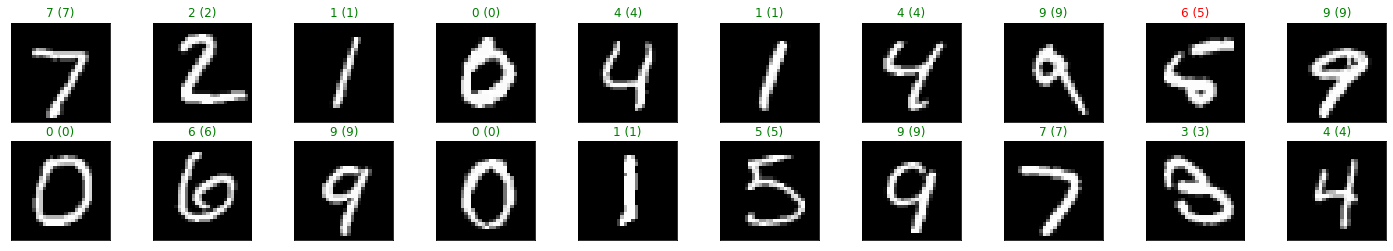

In [11]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))